In [1]:
# Introducing Principal component analysis

In [4]:
import numpy as np
import matplotlib.pyplot as plt

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

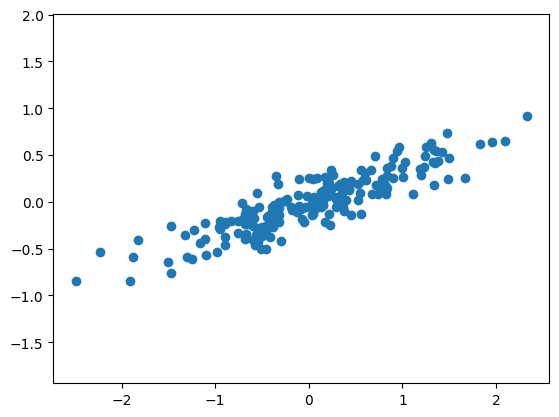

In [5]:
rng = np.random.RandomState(1)
x = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')

In [6]:
# In principal component analysis one quantifies this relationship 
# by finding a list of principal axes in the data

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

PCA(n_components=2)

In [8]:
# The fir learns some quantities of data , most importantly the components and explained variance

In [9]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [11]:
# To see what these numbers mean, let's visualize them as vectors
# over the input data, using the components to define the direction of the vector
# and explained variance to define the squared-length of the vector

In [12]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

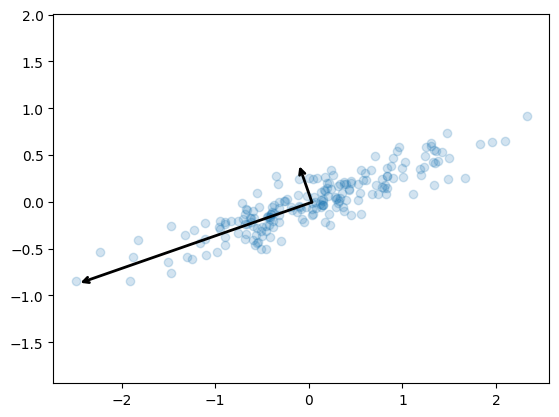

In [13]:
# Plot data
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector *  3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

In [14]:
# These vecotrs represnt the principal axis of the data
# The projection of each data point onto the principal axes are
# the principal components of the data

In [15]:
# This transformation from data axes to principal axes is an affine transformation which basically
# means it is composed of translation, rotation, and uniform scaling

In [16]:
# PCA AS DIMENSIONALITY REDUCTION

In [17]:
# using PCA as dimensionality reduction transform

In [18]:
pca = PCA(n_components=1)
pca.fit(x)
x_pca = pca.transform(x)

In [19]:
print('original shape: ', x.shape)
print('transform shaped: ', x_pca.shape)

original shape:  (200, 2)
transform shaped:  (200, 1)


In [20]:
# The transformed data has been reduced to a single transformation

(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

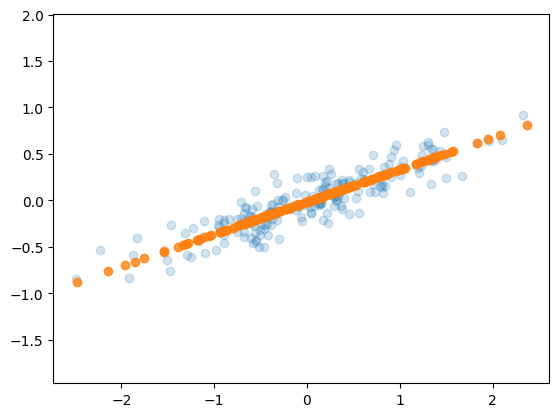

In [21]:
x_new = pca.inverse_transform(x_pca)
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
plt.scatter(x_new[:, 0], x_new[:, 1], alpha=0.8)
plt.axis('equal')

In [22]:
# PCA FOR VISUALIZATION : HANDWRITTEN DIGITS

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [24]:
pca = PCA(2) # project from 64 to 2 dimension
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [25]:
# We can now plot the first 2 principal components of each point to learn about the data

C:\Users\Family\AppData\Local\Temp\ipykernel_32852\3378560750.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Accent', 10))


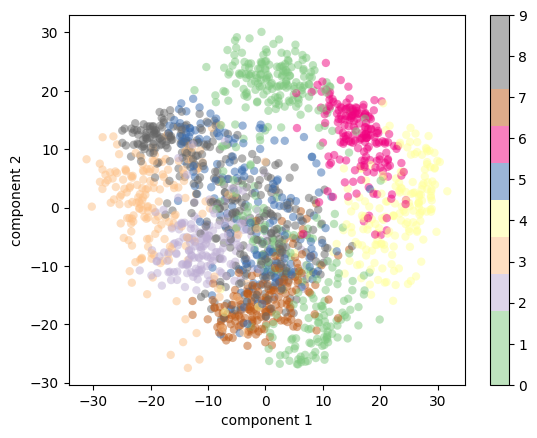

In [28]:
plt.scatter(projected[:, 0], projected[:, 1], 
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [29]:
# These components mean that full data is a 64 dimensional point cloud
# and these points are the projection of each data point along the directions
# with the largest variance

In [30]:
# Choosing the number of components:
# A vital part of using PCA in practice is the ability to estimate how many
# components are needed to describe the data
# we can determine this by looking at the cumulative 'explained variance ratio' as 
# a function of the number of components

Text(0, 0.5, 'Cumulative explained variance')

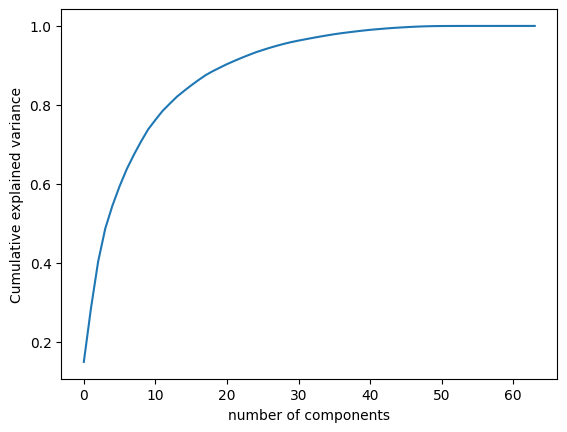

In [31]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Cumulative explained variance')

In [32]:
# This curve quantifies how much of the total, 64 dimensional variance
# is contained within the first N components
# for example we see that with the digits the first 10 components contain approx 75% of the variance
# while you need around 50 components to describe close to 100% of the variance

In [33]:
# PCA as noise filtering:
# any components with variance much larger than the effect of the noise should be
# relatively unaffected by the noise

In [34]:
# If you construct the data using just the largest subset of principal
# components, you should be preferentially keeping the signal and throwing out the noise

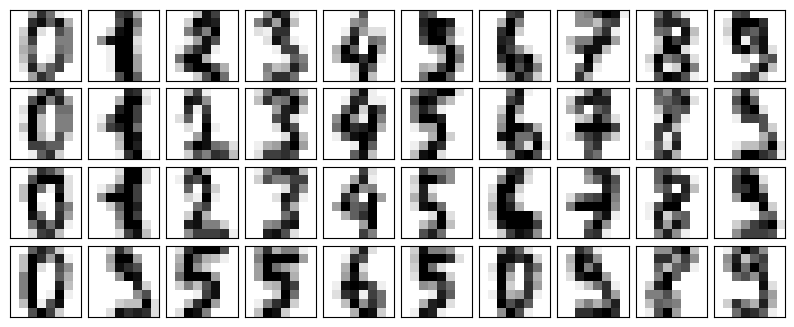

In [35]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), 
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest', clim=(0, 16))
plot_digits(digits.data)

In [36]:
# now lets add some random noise to create a noisy dataset, and replot it

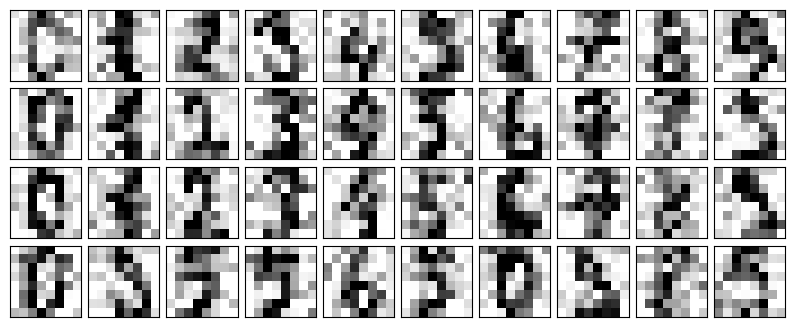

In [37]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [38]:
# It is clear by eyes that images are noisy
# and contain spurious pixels 
# lets train a PCA on the noisy data
# noticing that the projection preserves 50% of the variance

In [39]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

In [40]:
# Here 50% variance amount to 12 principal components
# Now we compute these components and then use the inverse of the transform
# to reconstruct the filtered digits

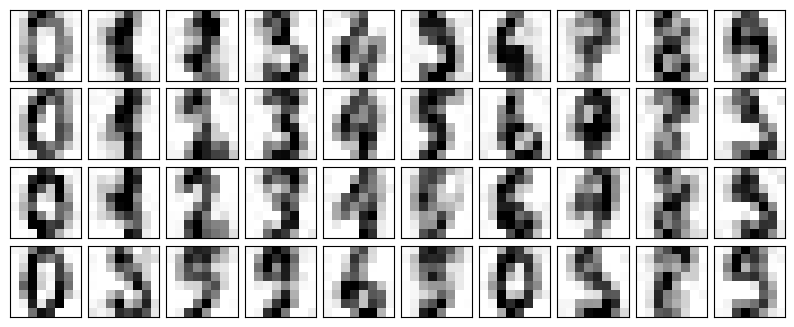

In [41]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [42]:
# Digits denoised using PCA

In [ ]:
# This signal preserving noise filtering property makes PCA a very useful feature selection
# routine 